In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
folder_path = './processed_data'

gt_data_train_path = './processed_data/train/gt'
image_data_train_path = './processed_data/train/img'
density_data_train_path = './processed_data/train/den'

gt_data_val_path = './processed_data/val/gt'
image_data_val_path = './processed_data/val/img'
density_data_val_path = './processed_data/val/den'

gt_data_test_path = './processed_data/test/gt'
image_data_test_path = './processed_data/test/img'
density_data_test_path = './processed_data/test/den'

Il dataset è suddiviso in train set, validation set e test set nel seguente modo:

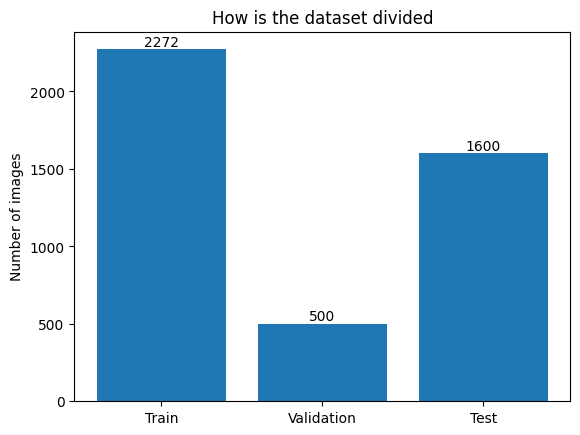

In [3]:
ntrain = len(os.listdir(image_data_train_path))
nval = len(os.listdir(image_data_val_path))
ntest = len(os.listdir(image_data_test_path))
x = ["Train", "Validation", "Test"]
y = [ntrain, nval, ntest]
fig, ax = plt.subplots()
ax.bar(x, y)
for i, v in enumerate(y):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')
ax.set_ylabel("Number of images")
ax.set_title("How is the dataset divided")
plt.show()


Per rendere uniformi i confronti il dataset è suddiviso in tre cateogrie: Low Density (immagini con meno di 50 persone), High Density (immagini con più di 500 persone) e Medium Density (tra 50 e 500 persone).

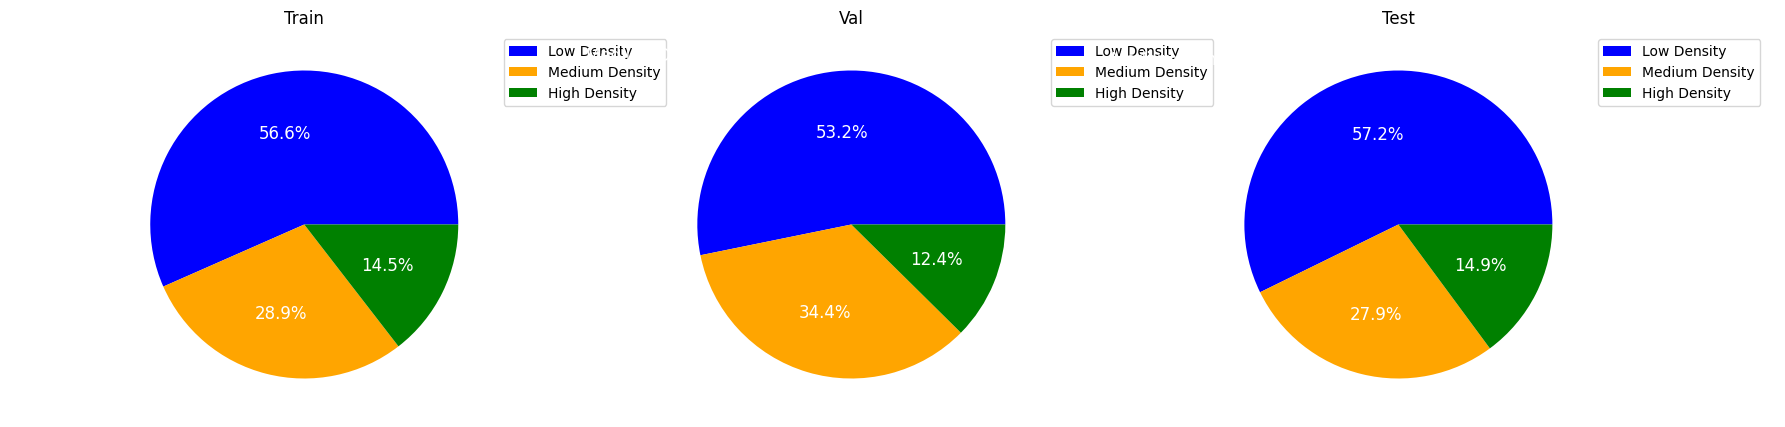

In [7]:
train_txtfile_path = folder_path + '/train' + '/image_labels.txt'
val_txtfile_path = folder_path + '/val' + '/image_labels.txt'
test_txtfile_path = folder_path + '/test' + '/image_labels.txt'
files = ['Train', 'Val', 'Test']

categories = ['Low Density', 'Medium Density', 'High Density']
value_ranges = [(float('-inf'), 50), (51, 500), (501, float('inf'))]

# Read in the text files and calculate the row counts for each category
dfs = []
for file_path in [train_txtfile_path, val_txtfile_path, test_txtfile_path]:
    df = pd.read_csv(file_path, header=None, delimiter=',')
    df['category'] = pd.cut(df[1], bins=[value_range[0] for value_range in value_ranges] + [value_ranges[-1][1]], labels=categories)
    row_counts = df['category'].value_counts()
    dfs.append(row_counts)

# Plot the results as pie charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i, row_counts in enumerate(dfs):
    ax = axes[i]
    labels = [f'{category} ({count}: {value_range[0]}-{value_range[1]})' for category, count, value_range in zip(row_counts.index, row_counts, value_ranges)]
    colors = ['blue', 'orange', 'green']
    ax.pie(row_counts, labels=labels, autopct='%1.1f%%', textprops={'color': 'w', 'fontsize': 12}, colors=colors)
    ax.set_title(files[i])
    ax.legend(categories, loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [8]:
dfs = []
for file_path in [train_txtfile_path, val_txtfile_path, test_txtfile_path]:
    df = pd.read_csv(file_path, header=None, delimiter=',')
    summary_stats = pd.DataFrame({
        'Mean': [df[1].mean()],
        'Median': [df[1].median()],
        'Min': [df[1].min()],
        'Max': [df[1].max()]
    }, index=[file_path.replace(folder_path, "").replace('/image_labels.txt', "")])
    dfs.append(summary_stats)

# Concatenate the summary statistics dataframes into a single dataframe
summary_stats_table = pd.concat(dfs)

# Display the summary statistics table
print(summary_stats_table)

              Mean  Median  Min    Max
/train  371.761444   111.0    0  25791
/val    297.008000    94.5    2   5929
/test   326.161875   117.5    0   9059


Ogni cartella (train, val, test) contiene un file di testo .txt informazioni su quella porzione di dataset. Il parametro "weather-label" descrive le condizioni metereologiche dell'immagine e può assumere i seguenti valori: 0 condizioni normali, 1 pioggia, 2 nebbia, 3 neve. Il parametro "distractor" assume il valore "1" quando all'interno dell'immagine sono presenti alcuni elementi dello sfondo (non umani) che potrebbero essere confusi con persone.

In [9]:
df = pd.read_csv(train_txtfile_path, header=None, names=['filename', 'number of people', 'scene-label', 'weather-label', 'distractor'])
print(df.head())

   filename  number of people scene-label  weather-label  distractor
0         1               161  water park              0           0
1         8               855    marathon              0           0
2        10               455     protest              0           0
3        12              7139     stadium              0           0
4        14               111     protest              0           0


Ad ogni immagine è inoltre associato un file .txt contenente le coordinate in pixel delle singole teste presenti nell'immagine

In [10]:
txtfileimage_path = gt_data_train_path + '/0001.txt'
df = pd.read_csv(txtfileimage_path, header=None, names=['x-pixel', 'y-pixel'])
print(df.head())

   x-pixel  y-pixel
0      106      114
1      705       79
2      661      361
3      212      332
4      704      236
